In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Zadanie 1

In [40]:
def euler_method(g, t0, y0, t_end, n_steps=None, h=None):
    if h is None and n_steps is None:
        raise ValueError("No h or n_steps given")
    elif h is not None:
        n_steps = int((t_end - t0) / h)
    elif n_steps is not None:
        h = (t_end - t0) / n_steps
    t = np.linspace(t0, t0 + n_steps * h, n_steps + 1)
    y = np.zeros(n_steps + 1)

    y[0] = y0

    for n in range(n_steps):
        y[n + 1] = y[n] + h * g(y[n], t[n])

    return t, y

In [41]:
def runge_kutty2(g, t0, y0, t_end, n_steps = None, h=None):
    if h is None and n_steps is None:
        raise ValueError("No h or n_steps given")
    elif h is not None:
        n_steps = int((t_end - t0) / h)
    elif n_steps is not None:
        h = (t_end - t0) / n_steps
    t = np.linspace(t0, t0 + n_steps * h, n_steps + 1)
    y = np.zeros(n_steps + 1)

    y[0] = y0

    for n in range(n_steps):
        k1 = h * g(y[n], t[n])
        k2 = h * g(y[n] + 0.5 * k1, t[n] + 0.5 * h)
        y[n + 1] = y[n] + k2

    return t, y


In [2]:
def runge_kutty4(g, t0, y0, t_end, n_steps=None, h=None, args=()):
    if h is None and n_steps is None:
        raise ValueError("No h or n_steps given")
    elif h is not None:
        n_steps = int((t_end - t0) / h)
    elif n_steps is not None:
        h = (t_end - t0) / n_steps
    t = np.linspace(t0, t0 + n_steps * h, n_steps + 1)
    y = np.zeros((n_steps + 1, np.size(y0)))

    y[0] = y0

    for n in range(n_steps):
        k1 = h * g(y[n], t[n], *args)
        k2 = h * g(y[n] + 0.5 * k1, t[n] + 0.5 * h, *args)
        k3 = h * g(y[n] + 0.5 * k2, t[n] + 0.5 * h, *args)
        k4 = h * g(y[n] + k3, t[n] + h, *args)

        y[n + 1] = y[n] + (k1 + 2*k2 + 2*k3 + k4) / 6.0

    return t, y.squeeze()


In [16]:
y0 = 1
x0 = 0
x1 = 0.03
steps = [1, 2, 4]
def g1(y, x):
    return x**2 - 4*y

def y1(x):
    return 31*np.exp(-4*x)/32 + x**2/4 - x/8 + 1/32

for step in steps:
    print(f"n steps: {step}")
    x1_euler, y1_euler = euler_method(g1, x0, y0, x1, n_steps=step)
    x1_rk2, y1_rk2 = runge_kutty2(g1, x0, y0, x1, n_steps=step)
    x1_rk4, y1_rk4 = runge_kutty4(g1, x0, y0, x1, n_steps=step)

    print("euler: ", x1_euler[-1], y1_euler[-1])
    print("rk2: ", x1_rk2[-1], y1_rk2[-1])
    print("rk4: ", x1_rk4[-1], y1_rk4[-1])
print("Answer: ", y1(x1))

n steps: 1
euler:  0.03 0.88
rk2:  0.03 0.88720675
rk4:  0.03 0.8869293781
n steps: 2
euler:  0.03 0.883603375
rk2:  0.03 0.8869955271437501
rk4:  0.03 0.8869291852678767
n steps: 4
euler:  0.03 0.8852986406921876
rk2:  0.03 0.8869453945835604
rk4:  0.03 0.8869291738135916
Answer:  0.8869291730697463


## Zadanie 2

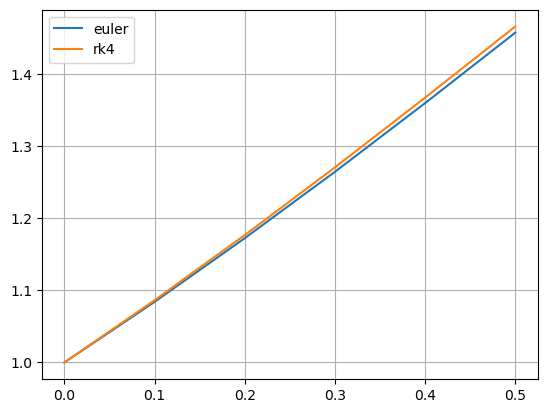

In [17]:
def g2(y, x):
    return np.sin(y)

x0_2 = 0
y0_2 = 1
x1_2 = 0.5
h2 = 0.1
x2_euler, y2_euler = euler_method(g2, x0_2, y0_2, x1_2, h=h2)
x2_rk4, y2_rk4 = runge_kutty4(g2, x0_2, y0_2, x1_2, h=h2)

plt.plot(x2_euler, y2_euler, label='euler')
plt.plot(x2_rk4, y2_rk4, label='rk4')
plt.grid()
plt.legend()

## Zadanie 3

$$
\frac{\text{d}^2\theta}{\text{d}\tau^2} + \frac{1}{Q} \frac{\text{d}\theta}{\text{d}\tau} + \sin{\theta} = \hat{A}\cos(\hat{\omega}\tau)
$$

Robimy podstawienie
$$
v = \frac{\text{d}\theta}{\text{d}\tau}.
$$
Wtedy powyższe równanie można przekształcić do postaci
$$
\frac{\text{d}v}{\text{d}\tau} = -\frac{v}{Q} - \sin{\theta} + \hat{A}\cos(\hat{\omega}\tau).
$$

In [3]:
Q = 2
omega = 2/3
A = np.array([0.5, 0.5, 1.35])
v0 = 0
theta0 = np.array([0.01, 0.3, 0.3])


def g3(y, tau, Q, A, omega):

    theta = y[0]
    v = y[1]
    
    dtheta_dtau = v
    dv_dtau = -(1/Q) * v - np.sin(theta) + A * np.cos(omega * tau)
    
    return np.array([dtheta_dtau, dv_dtau])

t3_start = 0
t3_end = 150
dt3 = 0.05

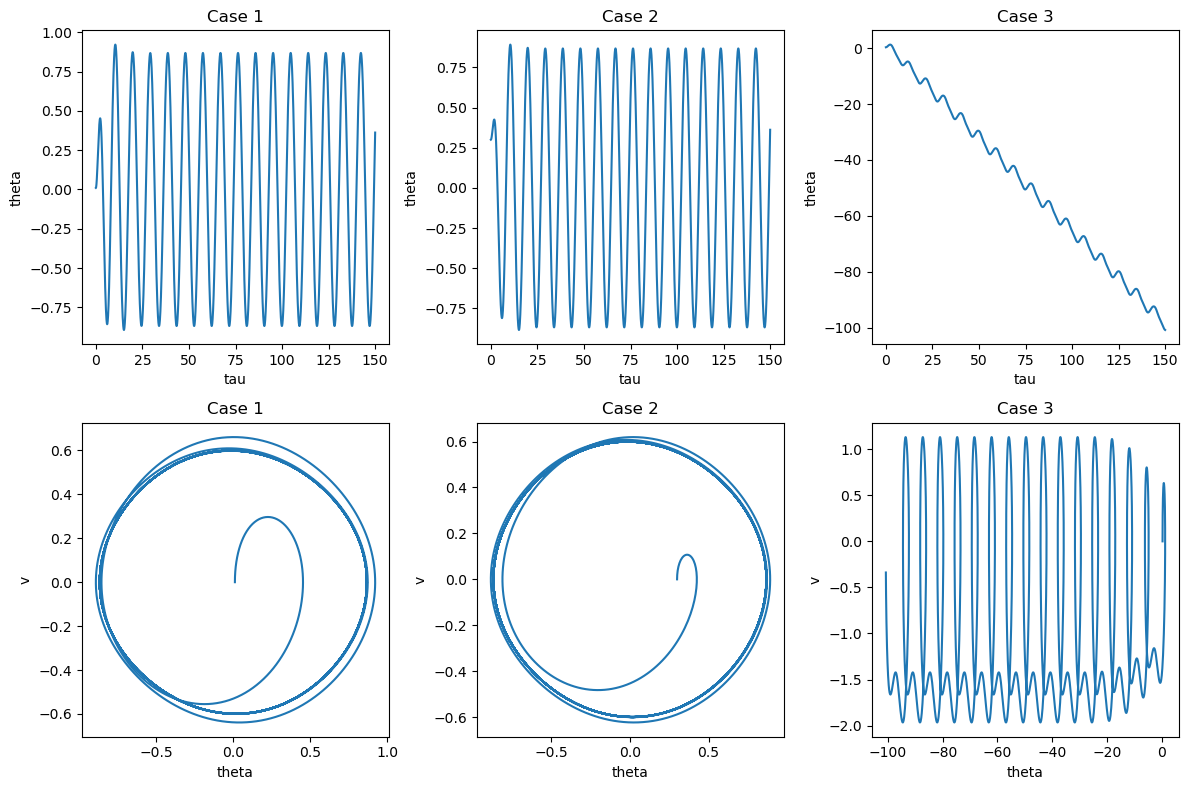

In [50]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i in range(3):
    tau, y3 = runge_kutty4(g3, t3_start, np.array([theta0[i], v0]), t3_end, h=dt3, args=(Q, A[i], omega))
    theta_val = y3[:, 0]
    v_val = y3[:, 1]
    axes[0][i].plot(tau, theta_val)
    axes[0][i].set_xlabel("tau")
    axes[0][i].set_ylabel("theta")
    axes[0][i].set_title(f"Case {i+1}")

    axes[1][i].plot(theta_val, v_val)
    axes[1][i].set_xlabel("theta")
    axes[1][i].set_ylabel("v")
    axes[1][i].set_title(f"Case {i+1}")

plt.tight_layout()

## Zadanie 4

Z II zasady dynamiki Newtona mamy
$$
m\vec{a} = m\frac{\text{d}^2\vec{r}}{\text{d}t^2}.
$$
Rozważając osobno osie x i y w przypadku bez oporów powietrza dostajemy
$$
\frac{\text{d}^2x}{\text{d}t^2} = 0, \quad \frac{\text{d}^2y}{\text{d}t^2} = -g,
$$
gdzie g to przyspiesznie ziemskie. Podstawiając za pochodne $v_x$ i $v_y$ dostajemy
$$
v_x = \frac{\text{d}x}{\text{d}t}, \quad v_y = \frac{\text{d}y}{\text{d}t}, \quad \frac{\text{d}v_x}{\text{d}t} = 0, \quad \frac{\text{d}v_y}{\text{d}t} = -g.
$$
Dodatkowo 
$$
v_x = v\cos{\alpha}, \quad v_y = v\sin{\alpha}.
$$

In [4]:
def ball_a_x(state, t, angle):
    x = state[0]
    v = state[1]
    
    dx_dt = v*np.cos(angle)
    dv_dt = 0
    
    return np.array([dx_dt, dv_dt])

def ball_a_y(state, t, angle, g=9.81):
    y = state[0]
    v = state[1]
    
    dy_dt = v*np.sin(angle)
    dv_dt = -g
    
    return np.array([dy_dt, dv_dt])

Text(0, 0.5, 'y')

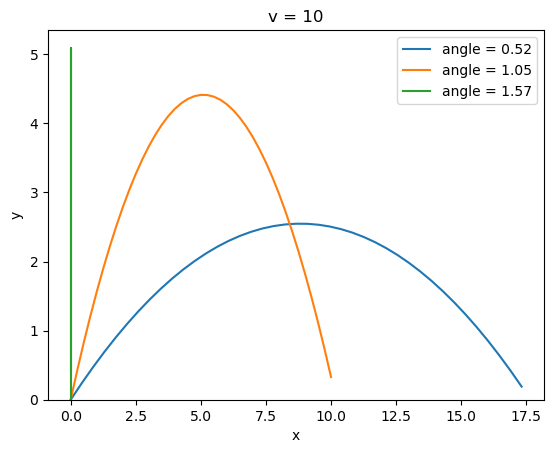

In [5]:
angles = np.array([np.pi/6, np.pi/3, np.pi/2])
v0_4 = np.array([2, 5, 10])
t4_start = 0
t4_end = 2
dt4 = 0.05

x0_4 = 0
y0_4 = 0

for i in range(3):
    t, outcomex = runge_kutty4(ball_a_x, t4_start, np.array([x0_4, v0_4[2]]), t4_end, h=dt4, args=(angles[i],))
    t, outcomey = runge_kutty4(ball_a_y, t4_start, np.array([y0_4, v0_4[2]]), t4_end, h=dt4, args=(angles[i],))

    x = outcomex[:, 0]
    y = outcomey[:, 0]
    plt.plot(x, y, label=f"angle = {round(angles[i], 2)}")

plt.legend()
plt.title("v = 10")
plt.ylim(0, None)
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

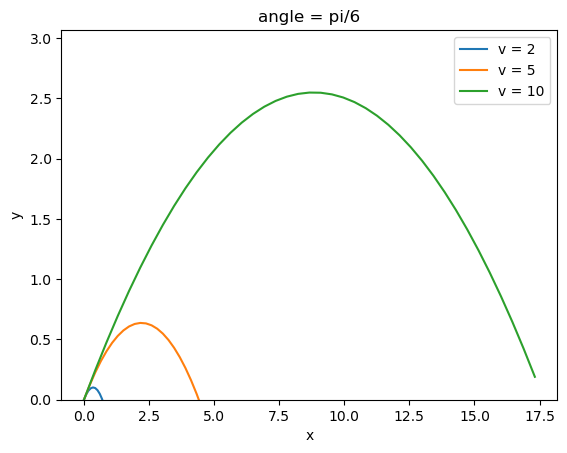

In [108]:
for i in range(3):
    t, outcomex = runge_kutty4(ball_a_x, t4_start, np.array([x0_4, v0_4[i]]), t4_end, h=dt4, args=(angles[0],))
    t, outcomey = runge_kutty4(ball_a_y, t4_start, np.array([y0_4, v0_4[i]]), t4_end, h=dt4, args=(angles[0],))

    x = outcomex[:, 0]
    y = outcomey[:, 0]
    plt.plot(x, y, label=f"v = {v0_4[i]}")

plt.legend()
plt.title("angle = pi/6")
plt.ylim(0, None)
plt.xlabel("x")
plt.ylabel("y")

Dodając do modelu siłę oporu powietrza dostajemy:
$$
m\vec{a} = m\frac{\text{d}^2\vec{r}}{\text{d}t^2} - \frac{1}{2}c_w\rho A|v|\vec{v}
$$
Rozważając osobno osie x i y dostajemy
$$
\frac{\text{d}^2x}{\text{d}t^2} = - \frac{1}{2m}c_w\rho A|v|v_x, \quad \frac{\text{d}^2y}{\text{d}t^2} = -g - \frac{1}{2m}c_w\rho A|v|v_y,
$$
gdzie
$$
v_x = v\cos{\alpha }= \frac{\text{d}x}{\text{d}t}, \quad v_y = v\sin{\alpha} = \frac{\text{d}y}{\text{d}t}.
$$

In [11]:
cw = 0.35
rho = 1.2
A = np.array([1, 2, 5])
m = 0.5

def ball_b_x(state, t, angle, cw, rho, A, m):
    x = state[0]
    v = state[1]
    vx = v*np.cos(angle)
    vy = v*np.sin(angle)
    dx_dt = vx
    dv_dt = -cw*rho*A*np.sqrt(vx**2+vy**2)*vx/(2*m)
    
    return np.array([dx_dt, dv_dt])

def ball_b_y(state, t, angle, cw, rho, A, m, g=9.81):
    y = state[0]
    v = state[1]
    vx = v*np.cos(angle)
    vy = v*np.sin(angle)
    dy_dt = vy
    dv_dt = -g - cw*rho*A*np.sqrt(vx**2+vy**2)*vy/(2*m)
    
    return np.array([dy_dt, dv_dt])

Text(0, 0.5, 'y')

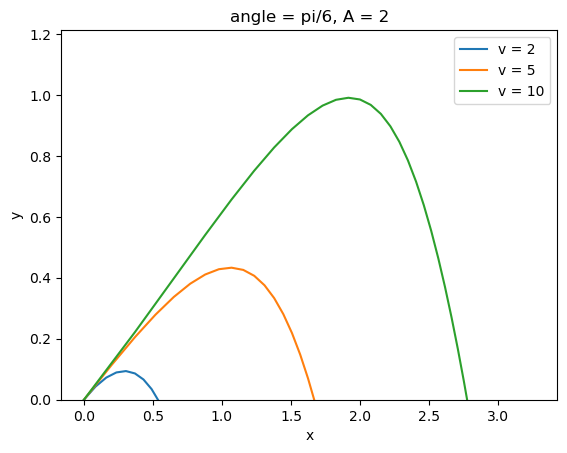

In [13]:
for i in range(3):
    t, outcomex = runge_kutty4(ball_b_x, t4_start, np.array([x0_4, v0_4[i]]), t4_end, h=dt4, args=(angles[0], cw, rho, A[1], m))
    t, outcomey = runge_kutty4(ball_b_y, t4_start, np.array([y0_4, v0_4[i]]), t4_end, h=dt4, args=(angles[0], cw, rho, A[1], m))

    x = outcomex[:, 0]
    y = outcomey[:, 0]
    plt.plot(x, y, label=f"v = {v0_4[i]}")

plt.legend()
plt.title("angle = pi/6, A = 2")
plt.ylim(0, None)
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

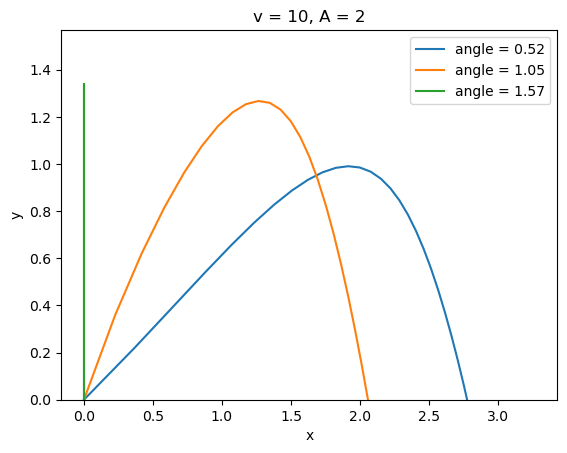

In [15]:
for i in range(3):
    t, outcomex = runge_kutty4(ball_b_x, t4_start, np.array([x0_4, v0_4[2]]), t4_end, h=dt4, args=(angles[i], cw, rho, A[1], m))
    t, outcomey = runge_kutty4(ball_b_y, t4_start, np.array([y0_4, v0_4[2]]), t4_end, h=dt4, args=(angles[i], cw, rho, A[1], m))

    x = outcomex[:, 0]
    y = outcomey[:, 0]
    plt.plot(x, y, label=f"angle = {round(angles[i], 2)}")

plt.legend()
plt.title("v = 10, A = 2")
plt.ylim(0, None)
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

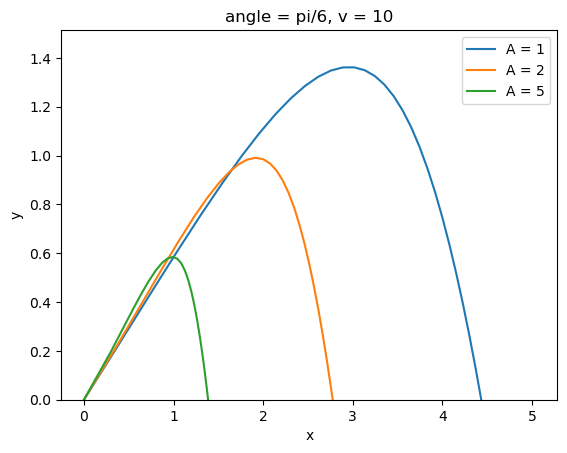

In [17]:
for i in range(3):
    t, outcomex = runge_kutty4(ball_b_x, t4_start, np.array([x0_4, v0_4[2]]), t4_end, h=dt4, args=(angles[0], cw, rho, A[i], m))
    t, outcomey = runge_kutty4(ball_b_y, t4_start, np.array([y0_4, v0_4[2]]), t4_end, h=dt4, args=(angles[0], cw, rho, A[i], m))

    x = outcomex[:, 0]
    y = outcomey[:, 0]
    plt.plot(x, y, label=f"A = {A[i]}")

plt.legend()
plt.title("angle = pi/6, v = 10")
plt.ylim(0, None)
plt.xlabel("x")
plt.ylabel("y")

## Zadanie 5

In [21]:
def g5(Y, x):
    y, dy = Y
    ddy = -(1-0.2*x)*y**2
    return np.array([dy, ddy])

def F(s, h=0.001):
    t, Y = runge_kutty4(g5, t0=0.0, y0=np.array([0.0, s]), t_end=np.pi/2, h=h)
    return Y[-1, 0] - 1.0


In [22]:
def bisekcja(f, a, b, eps=1e-10, max_iter=1000):    
    fa = f(a)
    fb = f(b)

    if fa * fb > 0:
        raise ValueError("f(a)*f(b) > 0")
    
    for _ in range(max_iter):
        c = (a + b) / 2
        fc = f(c)

        if abs(fc) < eps or (b - a) / 2 < eps:
            return c
        
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

    return (a + b) / 2

y'(0) = 0.7790223370830063


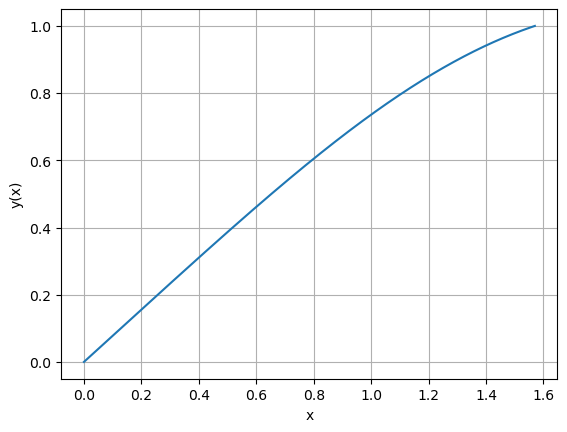

In [28]:
s = bisekcja(F, 0.0, 5.0)
print("y'(0) =", s)

t, Y = runge_kutty4(g5, t0=0.0, y0=np.array([0.0, s]), t_end=np.pi/2, h=0.001)

y = Y[:, 0]
plt.plot(t, y)
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid()
